## Семинар 2 "Распознавание рукописных цифр"

ФИО: Новак Александр Вадимович

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [2]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

# I hadn't enough patience to wait for custom layers
from torch import nn

import numpy as np
import sys
from layers import Linear, Sigmoid, NLLLoss, NeuralNetwork # Results from Seminar 1
from IPython.display import clear_output
%matplotlib inline

In [ ]:
def plot_train_results(loss_results: list, acc_results: list, labels: list) -> None:
  """plots loss and accuracy from given lists"""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    for loss_result, label in zip(loss_results, labels):
        plt.plot(loss_result, label=label)

    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.legend(loc=0, fontsize=16)
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    for acc_result, label in zip(acc_results, labels):
        plt.plot(acc_result, label=label)

    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.legend(loc=0, fontsize=16)
    plt.grid()
    plt.show()

In [5]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [6]:
X, y = next(iter(train_loader))
X = X.numpy()
y = y.numpy()

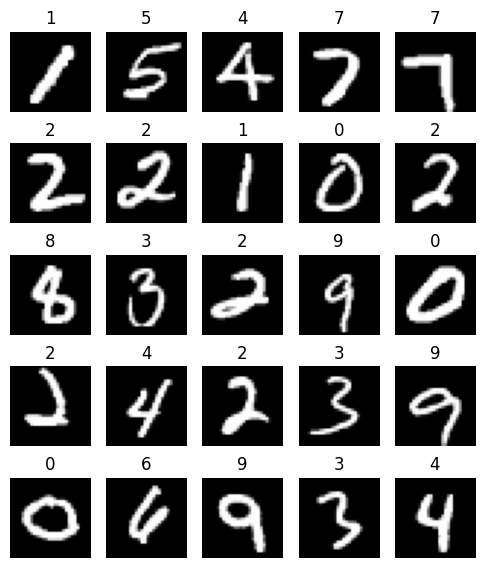

In [7]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [8]:
# def train(network, epochs, learning_rate, plot=True,
#           verbose=True, loss=None):
#     loss = loss or NLLLoss()
#     train_loss_epochs = []
#     test_loss_epochs = []
#     train_accuracy_epochs = []
#     test_accuracy_epochs = []
#     try:
#         for epoch in range(epochs):
#             losses = []
#             accuracies = []
#             for X, y in train_loader:
#                 X = X.view(X.shape[0], -1).numpy()
#                 y = y.numpy()
#                 prediction = network.forward(X)
#                 loss_batch = loss.forward(prediction, y)
#                 losses.append(loss_batch)
#                 dLdx = loss.backward()
#                 network.backward(dLdx)
#                 network.step(learning_rate)
#                 accuracies.append((np.argmax(prediction, 1)==y).mean())
#             train_loss_epochs.append(np.mean(losses))
#             train_accuracy_epochs.append(np.mean(accuracies))
#             losses = []
#             accuracies = []    
#             for X, y in test_loader:
#                 X = X.view(X.shape[0], -1).numpy()
#                 y = y.numpy()
#                 prediction = network.forward(X)
#                 loss_batch = loss.forward(prediction, y)
#                 losses.append(loss_batch)
#                 accuracies.append((np.argmax(prediction, 1)==y).mean())
#             test_loss_epochs.append(np.mean(losses))
#             test_accuracy_epochs.append(np.mean(accuracies))
#             clear_output(True)
#             if verbose:
#                 sys.stdout.write('\rEpoch {0}... (Train/Test) NLL: {1:.3f}/{2:.3f}\tAccuracy: {3:.3f}/{4:.3f}'.format(
#                             epoch, train_loss_epochs[-1], test_loss_epochs[-1],
#                             train_accuracy_epochs[-1], test_accuracy_epochs[-1]))
#             if plot:
#                 plt.figure(figsize=(12, 5))
#                 plt.subplot(1, 2, 1)
#                 plt.plot(train_loss_epochs, label='Train')
#                 plt.plot(test_loss_epochs, label='Test')
#                 plt.xlabel('Epochs', fontsize=16)
#                 plt.ylabel('Loss', fontsize=16)
#                 plt.legend(loc=0, fontsize=16)
#                 plt.grid('on')
#                 plt.subplot(1, 2, 2)
#                 plt.plot(train_accuracy_epochs, label='Train accuracy')
#                 plt.plot(test_accuracy_epochs, label='Test accuracy')
#                 plt.xlabel('Epochs', fontsize=16)
#                 plt.ylabel('Accuracy', fontsize=16)
#                 plt.legend(loc=0, fontsize=16)
#                 plt.grid('on')
#                 plt.show()
#     except KeyboardInterrupt:
#         pass
#     return train_loss_epochs, \
#            test_loss_epochs, \
#            train_accuracy_epochs, \
#            test_accuracy_epochs

In [9]:
# network = NeuralNetwork([
#     Linear(784, 100), Sigmoid(), # 28 * 28
#     Linear(100, 100), Sigmoid(),
#     Linear(100, 10)
# ])
network = nn.Sequential(
    nn.Linear(784, 100),
    nn.Sigmoid(),
    nn.Linear(100, 100),
    nn.Sigmoid(),
    nn.Linear(100, 10)
)

loss = NLLLoss()

Epoch 19... (Train/Test) NLL: 0.310/0.302	Accuracy: 0.918/0.919

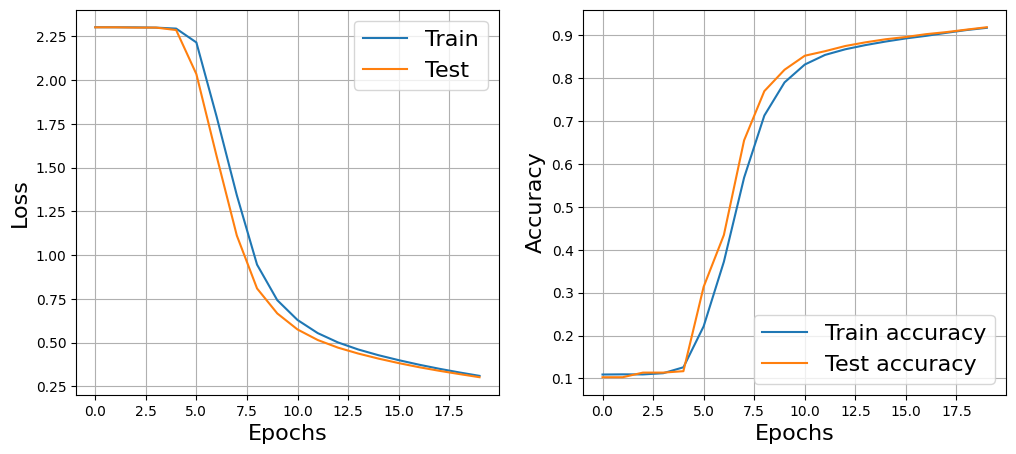

In [10]:
tr_s, ts_s, tr_ac_s, ts_ac_s = train(network, 20, 0.01)

### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

In [11]:
class ReLU:
    def __init__(self):
        pass

    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.X = X
        return np.maximum(X, 0)

    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        return (self.X > 0) * dLdy

    def step(self, learning_rate):
        pass

In [12]:
# class ReLU:
#     def __init__(self):
#         pass

#     def forward(self, X):
#         '''
#         Passes objects through this layer.
#         X is np.array of size (N, d)
#         '''
#         self.X = X
#         return np.maximum(X, 0)

#     def backward(self, dLdy):
#         '''
#         1. Compute dLdx.
#         2. Return dLdx
#         '''
#         dydX = (self.X >= 0).astype(float)
#         return dLdy*dydX

#     def step(self, learning_rate):
#         pass

In [13]:
class ELU:
    '''
    ELU(x) = x, x > 0; a*(e^x - 1), x <= 0
    '''
    
    def __init__(self, a=1):
        self.a = a

    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.X = X
        return X * (X > 0) + self.a * (np.exp(X) - 1) * (X <= 0)
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        X = self.X
        dydX = (X > 0) + self.a * np.exp(X) * (X <= 0)
        return dLdy*dydX

    def step(self, learning_rate):
        pass

Epoch 1... (Train/Test) NLL: 0.453/0.346	Accuracy: 0.868/0.897

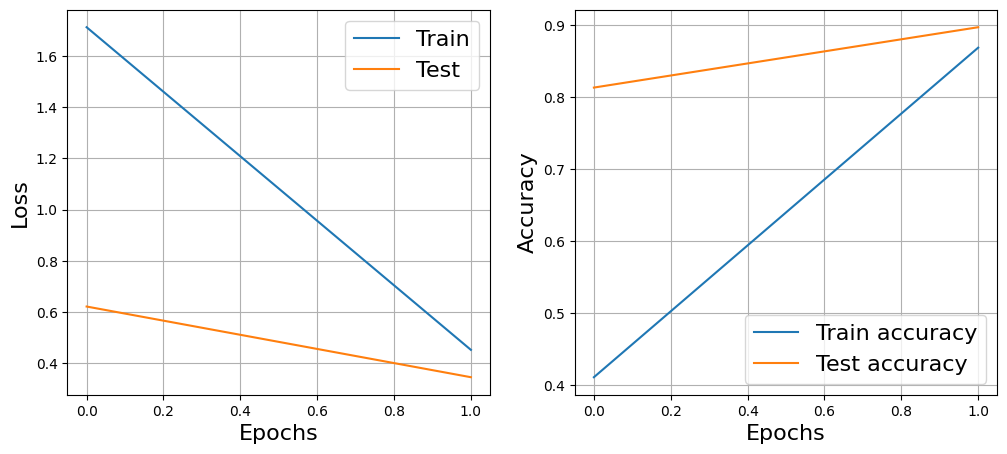

In [14]:
network = NeuralNetwork([
    Linear(784, 100), ReLU(),
    Linear(100, 100), ReLU(),
    Linear(100, 10)
])
loss = NLLLoss()
tr_r, ts_r, tr_ac_r, ts_ac_r = train(network, 20, 0.01, plot=True, verbose=True)

Epoch 19... (Train/Test) NLL: 0.046/0.079	Accuracy: 0.987/0.976

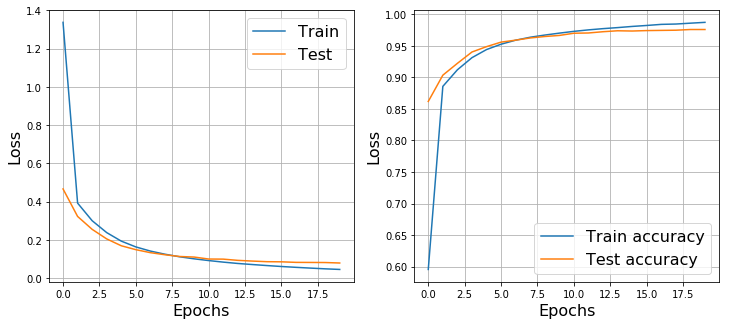

In [ ]:
network = NeuralNetwork([Linear(784, 100), ELU(),
               Linear(100, 100), ELU(),
               Linear(100, 10)])
loss = NLLLoss()
tr_e, ts_e, tr_ac_e, ts_ac_e = train(network, 20, 0.01, plot=True, verbose=True)

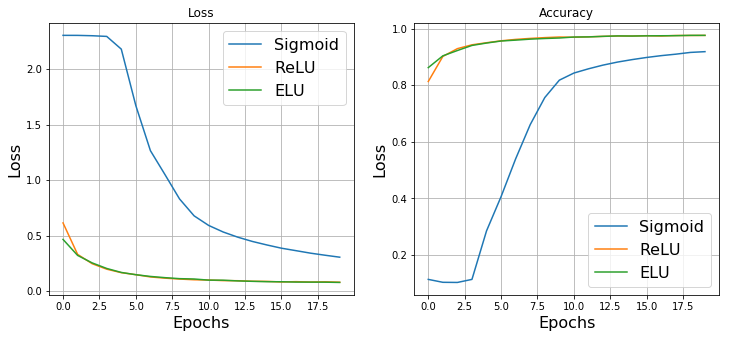

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(ts_s, label='Sigmoid')
plt.plot(ts_r, label='ReLU')
plt.plot(ts_e, label='ELU')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.grid()
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(ts_ac_s, label='Sigmoid')
plt.plot(ts_ac_r, label='ReLU')
plt.plot(ts_ac_e, label='ELU')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.grid()
plt.show()

### HW1 (1 балл): Реализовать Tanh

In [ ]:
class Tanh:
    '''
    Tanh(x) = (e^(2x) - 1) / (e^(2x) + 1)
    '''

    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        exp = np.exp(2 * X)
        self.out = (exp - 1) / (exp + 1)
        return self.out
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        return (1 - self.out ** 2) * dLdY

    def step(self, learning_rate):
        pass

### Часть 3: Анализ ошибок

In [ ]:
wrong_X = []
correct_y = []
predicted_y = []
logits = []
for X, y in test_loader:
    X = X.view(X.shape[0], -1).numpy()
    y = y.numpy()
    prediction = network.forward(X)
    prediction = np.exp(prediction)
    prediction /= prediction.sum(1, keepdims=True)
    for i in range(len(prediction)):
        if np.argmax(prediction[i]) != y[i]:
            wrong_X.append(X[i])
            correct_y.append(y[i])
            predicted_y.append(np.argmax(prediction[i]))
            logits.append(prediction[i][y[i]])
wrong_X = np.row_stack(wrong_X)
correct_y = np.row_stack(correct_y)[:, 0]
predicted_y = np.row_stack(predicted_y)[:, 0]
logits = np.row_stack(logits)[:, 0]

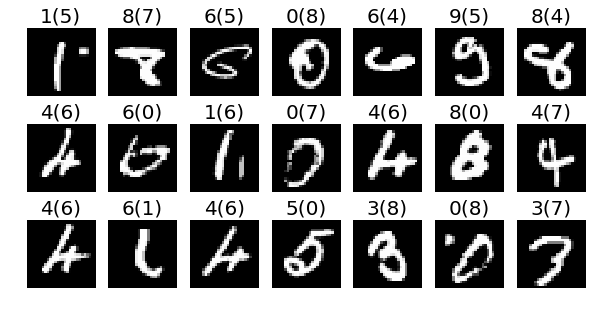

In [ ]:
plt.figure(figsize=(10, 5))
order = np.argsort(logits)
for i in range(21):
    plt.subplot(3, 7, i+1)
    plt.imshow(wrong_X[order[i]].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title('{}({})'.format(correct_y[order[i]], predicted_y[order[i]]), fontsize=20)
    plt.axis('off')

### Часть 4: Аугментация (HW, 2 балла)
* Небольшие вращения (-15, 15)
* Случайные сдвиги
* Шум

Какой прирост дают эти аугментации вместе и по отдельности

In [ ]:
# !pip install scikit-image
from skimage.transform import rotate

transform_rotation = transforms.Compose([
                      transforms.RandomRotation(15),
                      transforms.ToTensor(),
                      transforms.Normalize((0.1307,), (0.3081,))
                    ])

In [ ]:
transform_translation = transforms.Compose([
                          transforms.RandomAffine(degrees=0, translate=(0.05,0.05)),
                          transforms.ToTensor(),
                          transforms.Normalize((0.1307,), (0.3081,))
                        ])

In [ ]:
from torch import Generator, rand

class GaussianNoiseTransform(object):
  """ adds normal (gaussian) noise"""
    def __init__(self, mean: float = 0., std: float = 1., initial_seed = None):
        self.std = std
        self.mean = mean
        self.generator = torch.Generator()
        if initial_seed is not None:
          self.generator.manual_seed(initial_seed)
        
    def __call__(self, tensor):
        return tensor + torch.rand(tensor.size(), generator = self.generator) * \
          self.std + self.mean

transform_noise = transforms.Compose([
                          transforms.RandomAffine(degrees=0, translate=(0.05,0.05)),
                          transforms.ToTensor(),
                          transforms.Normalize((0.1307,), (0.3081,))
                        ])

### Часть 5: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?